<a href="https://colab.research.google.com/github/YOGDEV/car_plate_check/blob/main/APRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvcc --version

In [78]:
!pip install easyocr
#pip install 
!pip install imutils
!pip install opencv-python-headless==4.1.2.30
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import imutils
import easyocr

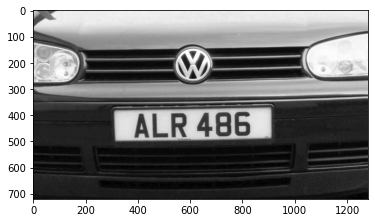

In [114]:
img=cv2.imread('/content/car1.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

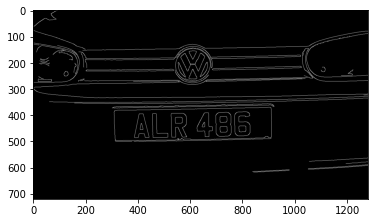

In [115]:
bfilter =cv2.bilateralFilter(gray,13,28,28)
edged=cv2.Canny(bfilter,90,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [116]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]


In [117]:
location=None
for contour in contours:
   approx =cv2.approxPolyDP(contour,10,True)
   if(len(approx)==4):
     location =approx 
     break;
    

In [118]:
location

array([[[910, 376]],

       [[314, 382]],

       [[313, 491]],

       [[905, 486]]], dtype=int32)

In [119]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

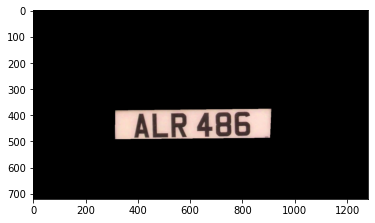

In [120]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [121]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

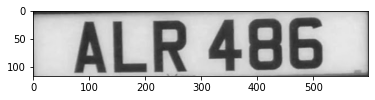

In [122]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [123]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[68, 0], [534, 0], [534, 116], [68, 116]], 'ALR 486', 0.997139694639937)]

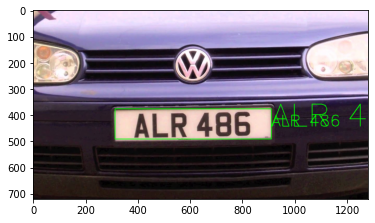

In [126]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=2,color=(0,255,0),thickness=2)
res=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),2)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))